<h2>Objectifs</h2>

Dans ce fichier, nous cherchons à mettre en forme les bases de données relatives aux trois axes dont nous cherchons à estimer le débit de voitures et le taux d'occupation (les champs Élysées, rue de la Convention, et la rue des Saints-Pères). Pour ce faire, nous allons utiliser les données brutes extraites, puis les retraiter afin de faire face aux données manquantes, ajouter des features (comme la météo, des données sur les vacances, des éventuels évènements dans Paris, des perturbations telles que des chantiers sur les axes d'intérêt directement ou sur les axes voisins...). 

Imports :

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_dt
from pandas.api.types import is_datetime64tz_dtype as is_dt_tz

Tout d'abord, nous allons déterminer comment se présente les données, c'est à dire le type de chaque colonne, le nombre de données non-nulles pour les variables numériques et les valeurs possibles prises pour les variables catégorielles. 

In [16]:
df = pd.read_csv('./dataset/champs_elysees.csv', sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifiant arc            9266 non-null   int64  
 1   Libelle                    9266 non-null   object 
 2   Date et heure de comptage  9266 non-null   object 
 3   Débit horaire              8703 non-null   float64
 4   Taux d'occupation          8644 non-null   float64
 5   Etat trafic                9266 non-null   object 
 6   Identifiant noeud amont    9266 non-null   int64  
 7   Libelle noeud amont        9266 non-null   object 
 8   Identifiant noeud aval     9266 non-null   int64  
 9   Libelle noeud aval         9266 non-null   object 
 10  Etat arc                   9266 non-null   object 
 11  Date debut dispo data      9266 non-null   object 
 12  Date fin dispo data        9266 non-null   object 
 13  geo_point_2d               9266 non-null   objec

Dans un premier temps, nous allons mettre le champ "Date et heure de comptage" dans un format compatible avec nos autres datasets, l'objectif étant plus tard de les fusionner. 

In [17]:
df['Date et heure de comptage'] = pd.to_datetime(
    df['Date et heure de comptage'],
    errors='coerce',
    utc=True
).dt.tz_convert('Europe/Paris').dt.tz_localize(None)
print(len(df['Date et heure de comptage'].unique()))

9266


Maintenant nous pouvons merge ce dataset avec celui donnant des informations sur la météo. On commence par importer le dataset relatif à la météo.

In [18]:
meteo = pd.read_csv('./dataset/meteo.csv', sep=";")

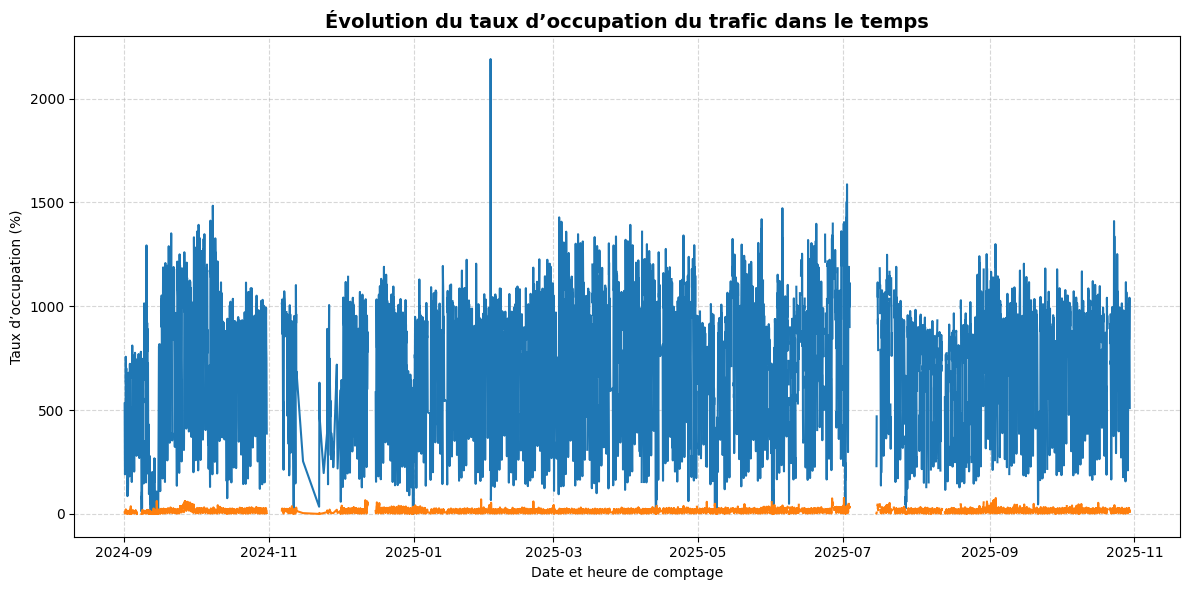

In [31]:
df = df.sort_values('Date et heure de comptage')


plt.figure(figsize=(12, 6))
plt.plot(df['Date et heure de comptage'][int(0*len(df['Date et heure de comptage'])/11) :], df['Débit horaire'][int(0*len(df['Date et heure de comptage'])/11) :], linewidth=1.5, label="débit")
plt.plot(df['Date et heure de comptage'][int(0*len(df['Date et heure de comptage'])/11) :], df['Taux d\'occupation'][int(0*len(df['Date et heure de comptage'])/11) :], linewidth=1.5, label="taux occ")
plt.title("Évolution du taux d’occupation du trafic dans le temps", fontsize=14, fontweight='bold')
plt.xlabel("Date et heure de comptage")
plt.ylabel("Taux d’occupation (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Nous allons maintenant fusionner les dataset de météo et celui comportant les données de circulation

In [30]:
meteo['datetime'] = pd.to_datetime(meteo['datetime'])
df_merge = pd.merge(df, meteo, left_on='Date et heure de comptage', right_on='datetime', how='left')

df_merge.to_csv('./merge.csv', sep=";", encoding='utf-8')